# Problem Statememnt ---> Customer churn is a significant issue for banks, impacting revenue and customer lifetime value. The goal is to develop a machine learning model that predicts whether a customer will churn (leave the bank) based on their demographic, financial, and account activity data.


In [1]:
# importing all the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the datset

In [2]:
df = pd.read_excel('datasets/Bank_churn_Data.xlsx')

In [3]:
# looking few rows
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure.1,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


### checking dataset using info(),describe() and all

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
 8   Balance          10001 non-null  object 
 9   NumOfProducts    10001 non-null  int64  
 10  HasCrCard        10001 non-null  object 
 11  Tenure.1         10001 non-null  int64  
 12  IsActiveMember   10001 non-null  object 
 13  Exited           10001 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure.1,IsActiveMember,Exited
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(10000, 14)

In [10]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Tenure.1,Exited
count,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922077,5.012800,1.530200,5.012800,0.203700
std,7.193619e+04,96.653299,10.489072,2.892174,0.581654,2.892174,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [11]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure.1', 'IsActiveMember', 'Exited'],
      dtype='object')

### checking Missing values

In [12]:
df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure.1           0
IsActiveMember     0
Exited             0
dtype: int64

In [13]:
df['Age'].median()

37.0

# we will not handle the outliers in this data the reason is this is bank data and many users whose age is more than 80 then high chance that they will churn

### Handling missing Value

In [14]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [15]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure.1,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


### using encoding method to change into numeric column

In [16]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['HasCrCard'] = df['HasCrCard'].map({'Yes':1, 'No':0})
df['IsActiveMember'] = df['IsActiveMember'].map({'Yes':1, 'No':0})

In [17]:
# handling Geography with label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
df['Geography'] = label_encoder.fit_transform(df['Geography'])

### removing euro sign and converting data into numeric column

In [19]:
df['Balance'] = df['Balance'].str.replace('€', '', regex=False)
df['EstimatedSalary'] = df['EstimatedSalary'].str.replace('€', '', regex=False)

df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')

In [20]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure.1,IsActiveMember,Exited
0,15634602,Hargrave,619,0,0,42.0,2,101348.88,0.00,1,1,2,1,1
1,15647311,Hill,608,4,0,41.0,1,112542.58,83807.86,1,1,1,1,0
2,15619304,Onio,502,2,0,42.0,8,113931.57,159660.80,3,0,8,0,1
3,15701354,Boni,699,0,0,39.0,1,93826.63,0.00,2,0,1,0,0
4,15737888,Mitchell,850,4,0,43.0,2,79084.10,125510.82,1,1,2,1,0


## Devided the data into X and Y and dropped features that is not required

In [21]:
y = df['Exited']
X = df.drop(df[['CustomerId','Surname','Exited','Tenure.1']], axis = 1)

### Featuring scaling

In [22]:
# importing the library

from sklearn.preprocessing import StandardScaler

#initialized the Library
scaler = StandardScaler()

In [23]:
# divided data into binary and numeric column

binary_column = ['Geography','HasCrCard','IsActiveMember','Gender']
numerical_column = X.drop(columns = binary_column).columns

In [24]:
x = X.copy()
x[numerical_column] = scaler.fit_transform(x[numerical_column])

In [25]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,-0.326221,0,0,0.293553,-1.041760,0.026191,-1.225848,-0.911583,1,1
1,-0.440036,4,0,0.198197,-1.387538,0.210964,0.117350,-0.911583,1,1
2,-1.536794,2,0,0.293553,1.032908,0.233892,1.333053,2.527057,0,0
3,0.501521,0,0,0.007485,-1.387538,-0.097978,-1.225848,0.807737,0,0
4,2.063884,4,0,0.388909,-1.041760,-0.341331,0.785728,-0.911583,1,1


### Importing all the required library and splitting the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## training the Model with multiple model and checking the accuracy

      Method Used  Accuracy
0  LogitRegession    0.8145
1           Dtree    0.7815
2         RForest    0.8625
3             XGB    0.8640
4             KNN    0.8430
5             SVM    0.8540
6             NBT    0.8415
7          Voting    0.8605
Axes(0.125,0.11;0.775x0.77)


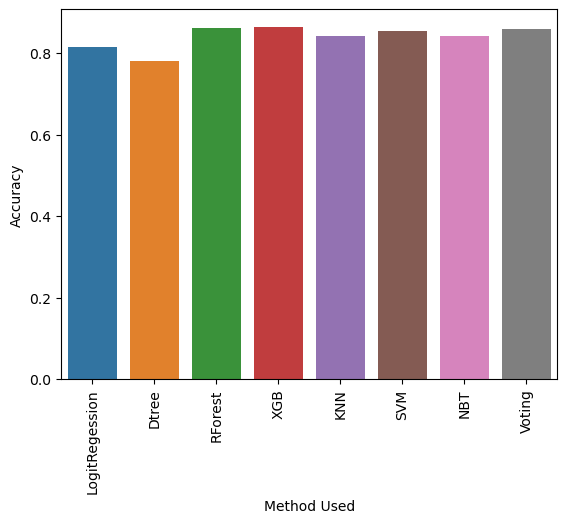

In [28]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

## Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

In [29]:


pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Testb Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 0.912
************************
Testb Accuracy : 0.8605


## using cross validation to overcome with overfitting

In [30]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train, y_train, cv=10)
#print("Training Accuracy :", training.mean())
print(f"Training Accuracy : {training.mean():.2f}")
print("***************")
print("Testb Accuracy :",accuracy_evc_test)

Training Accuracy : 0.86
***************
Testb Accuracy : 0.8605


In [31]:
training

array([0.8625 , 0.85625, 0.85375, 0.85875, 0.85   , 0.8575 , 0.8775 ,
       0.85125, 0.855  , 0.84625])

In [32]:
print("************************")
print("Training Accuracy :",classification_report(y_train, pred_evc_train))
print("************************")
print("Testb Accuracy :",classification_report(y_test, pred_evc_test))

************************
Training Accuracy :               precision    recall  f1-score   support

           0       0.90      1.00      0.95      6356
           1       0.98      0.59      0.73      1644

    accuracy                           0.91      8000
   macro avg       0.94      0.79      0.84      8000
weighted avg       0.92      0.91      0.90      8000

************************
Testb Accuracy :               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.80      0.39      0.52       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [33]:
print("************************")
print(confusion_matrix(y_train, pred_evc_train))
print("************************")
print(confusion_matrix(y_test, pred_evc_test))

************************
[[6334   22]
 [ 682  962]]
************************
[[1569   38]
 [ 241  152]]


# END